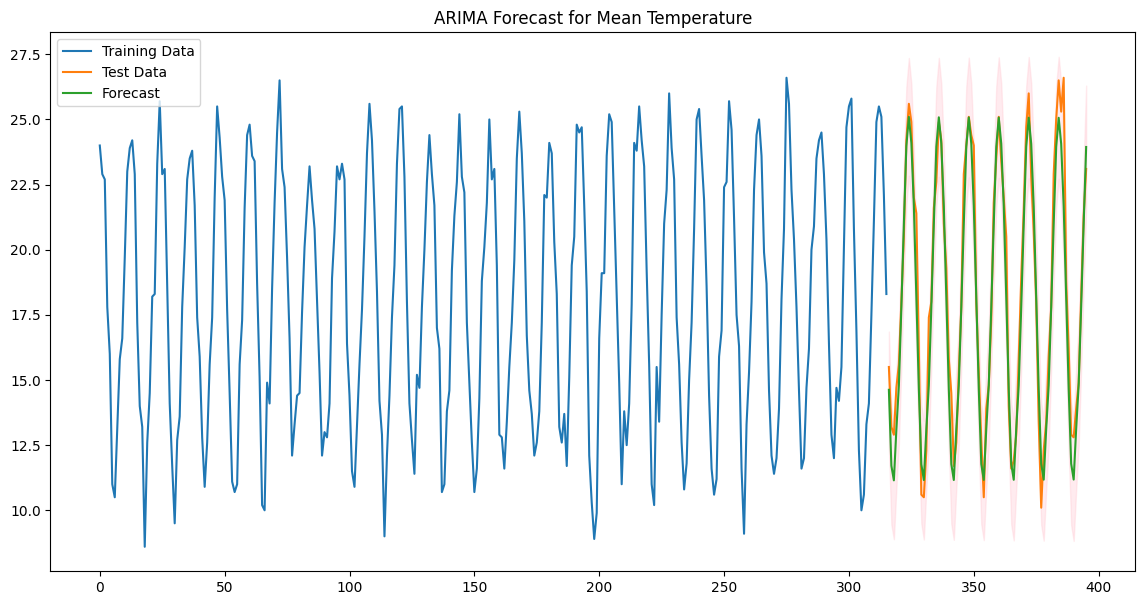

In [3]:
# Modelo ARIMA Forecasting para la temperatura media en la ciudad

import pmdarima as pm
from pmdarima.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/combined_data.csv')


# Split the data into training and test sets
train, test = train_test_split(data['meanTemp'], train_size=0.8)

# Fit an ARIMA model
model = pm.auto_arima(train, seasonal=True, m=12)

# Forecast the future values
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('ARIMA Forecast for Mean Temperature')
plt.show()


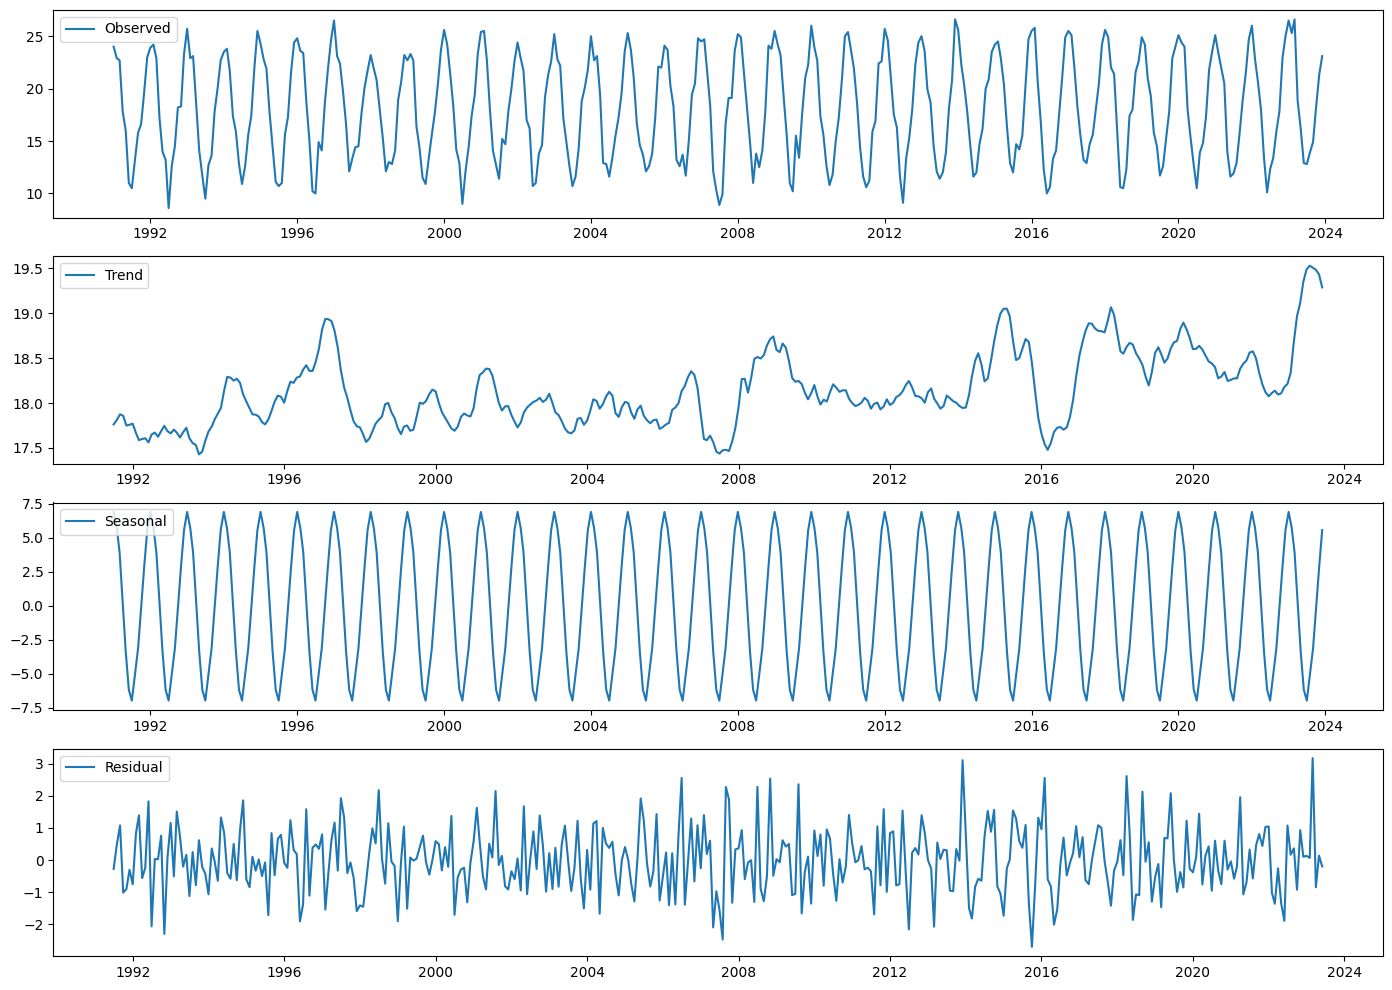

In [5]:
# Seasonal Decomposition of Time Series Data

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
file_path = './data/combined_data.csv'
data = pd.read_csv(file_path)

# Data cleaning and preparation
data.drop(columns=['Unnamed: 0'], inplace=True)
month_mapping = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
data['month'] = data['month'].map(month_mapping)
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
data.set_index('date', inplace=True)

# Perform seasonal decomposition for mean temperature
decomposition = seasonal_decompose(data['meanTemp'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
